In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'KH_new/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx_de = info['Lx/de']
ly_de = info['Ly/de']

lx_di = info['Lx/di']
ly_di = info['Ly/di']

nx = int(info['nx'])
ny = int(info['ny'])

lxr_di = np.linspace(0, lx_di, nx)
lyr_di = np.linspace(0, ly_di, ny)

lxr_de = np.linspace(0, lx_de, nx)
lyr_de = np.linspace(0, ly_de, ny)

print(twci[500])

69.05340000000001


In [3]:
def time_av(t, num = 5):
  pthe_t, pide_t = tb.ps_calc(dirs, times[t], 'electron')
  pthe = np.zeros(pthe_t.shape)
  pide = np.zeros(pide_t.shape)
  pthi_t, pidi_t = tb.ps_calc(dirs, times[t], 'ion')
  pthi = np.zeros(pthi_t.shape)
  pidi = np.zeros(pidi_t.shape)
  JiE_t, JeE_t, JE_t = tb.JE_calc(dirs, times[t])
  JiE = np.zeros(JE_t.shape)
  JeE = np.zeros(JE_t.shape)
  JE = np.zeros(JE_t.shape)
  for i in np.arange(int(-(num/2)), int(num/2)+1):
    pthe_t, pide_t = tb.ps_calc(dirs, times[t + i], 'electron')
    pthi_t, pidi_t = tb.ps_calc(dirs, times[t + i], 'ion')
    pthe = pthe + pthe_t
    pthi = pthi + pthi_t
    pide = pide + pide_t
    pidi = pidi + pidi_t
    JiE_t, JeE_t, JE_t = tb.JE_calc(dirs, times[t + i])
    JiE = JiE + JiE_t
    JeE = JeE + JeE_t
    JE = JE + JE_t
  JeE = JeE/num
  JiE = JiE/num
  JE = JE/num
  pthe = pthe/num
  pide = pide/num
  pthi = pthi/num
  pidi = pidi/num

  return JeE, JiE, JE, pthe, pide, pthi, pidi
# JE, pthe, pide, pthi, pidi = time_av(1087)
# print(JE.shape)

In [4]:
# def time_av(t, num = 5):
#   pthe_t, pide_t = tb.ps_calc(dirs, times[t], 'electron')
#   pthe = np.zeros(pthe_t.shape)
#   pide = np.zeros(pide_t.shape)
#   pthi_t, pidi_t = tb.ps_calc(dirs, times[t], 'ion')
#   pthi = np.zeros(pthi_t.shape)
#   pidi = np.zeros(pidi_t.shape)
#   JiE_t, JeE_t, JE_t = tb.JE_calc(dirs, times[t])
#   JiE = np.zeros(JE_t.shape)
#   JeE = np.zeros(JE_t.shape)
#   JE = np.zeros(JE_t.shape)
#   for i in np.arange(int(-(num/2)), int(num/2)+1):
#     pthe_t, pide_t = tb.ps_calc(dirs, times[t + i], 'electron')
#     pthi_t, pidi_t = tb.ps_calc(dirs, times[t + i], 'ion')
#     pthe = pthe + pthe_t
#     pthi = pthi + pthi_t
#     pide = pide + pide_t
#     pidi = pidi + pidi_t
#     JiE_t, JeE_t, JE_t = tb.JE_calc(dirs, times[t + i])
#     JiE = JiE + JiE_t
#     JeE = JeE + JeE_t
#     JE = JE + JE_t
#   JeE = JeE/num
#   JiE = JiE/num
#   JE = JE/num
#   pthe = pthe/num
#   pide = pide/num
#   pthi = pthi/num
#   pidi = pidi/num

#   return JeE, JiE, JE, pthe, pide, pthi, pidi
# # JE, pthe, pide, pthi, pidi = time_av(1087)
# # print(JE.shape)

In [5]:
t = 1100
print(twci[t])
f = tb.load_field_fil(dirs, times[t])
el = tb.load_hydro_fil(dirs, times[t], 'electron')
ion = tb.load_hydro_fil(dirs, times[t], 'ion')

151.91748000000004


In [6]:
j = np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)
jrms = np.sqrt(np.mean(j**2))
jnrm = j/jrms

In [7]:
jfrn = np.array([])
JEfrn = np.array([])
pidefrn = np.array([])
pidifrn = np.array([])
jmask = np.linspace(0, 5, 50)
Jie, JeE, JE = tb.JE_calc(dirs, times[t])
pthe, pide = tb.ps_calc(dirs, times[t], 'electron')
pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')
for fn in jmask:  
  jfil = np.where((jnrm > fn))
  JEfil = np.where((jnrm > fn) & (JE > 0))
  pidifil = np.where((jnrm > fn) & (pidi > 0))
  pidefil = np.where((jnrm > fn) & (pide > 0))
  JEfrn = np.append(JEfrn, np.sum(JE[JEfil]))
  pidifrn = np.append(pidifrn, np.sum(pidi[pidifil]))
  pidefrn = np.append(pidefrn, np.sum(pide[pidefil]))
  # JEind = np.where(jnrm > fn, JE, 0)
  # pideind = np.where(jnrm > fn, pide, 0)
  # pidiind = np.where(jnrm > fn, pidi, 0)
  # JEfil = np.average(JEind)
  # pidefil = np.average(pideind)
  # pidifil = np.average(pidiind)
  jfrn = np.append(jfrn, len(jfil[0]))
  # JEfrn = np.append(JEfrn, JEfil)
  # pidefrn = np.append(pidefrn, pidefil)
  # pidifrn = np.append(pidifrn, pidifil)

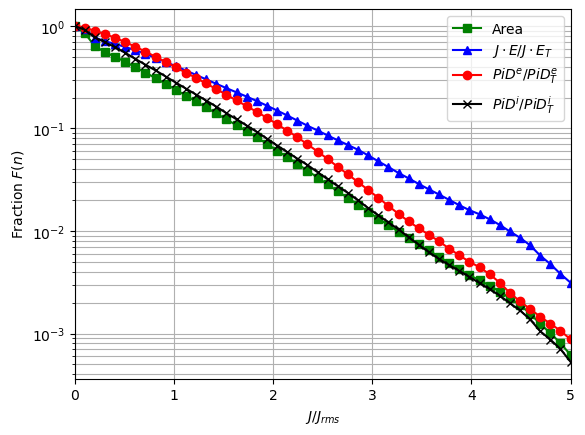

In [8]:
fig, ax = plt.subplots(1,1)
ax.semilogy(jmask, jfrn/jfrn[0], marker = 's', color = 'green', label = 'Area')
ax.semilogy(jmask, JEfrn/JEfrn[0], marker = '^', color = 'blue', label = r'$J \cdot E/J \cdot E_{T}$')
ax.semilogy(jmask, pidefrn/pidefrn[0], marker = 'o', color = 'red', label = r'$PiD^e/PiD^e_{T}$')
ax.semilogy(jmask, pidifrn/pidifrn[0], marker = 'x', color = 'black', label = r'$PiD^i/PiD^i_{T}$')
ax.legend()
ax.grid(which = 'both')
ax.set_xlim(0, 5)
ax.set_xlabel(r'$J/J_{rms}$')
ax.set_ylabel(r'Fraction $F(n)$')
fig.savefig(figs + 'Fn.png', dpi = 200)

Text(0, 0.5, '$\\langle J \\cdot E | J \\rangle/ \\langle J \\cdot E \\rangle$')

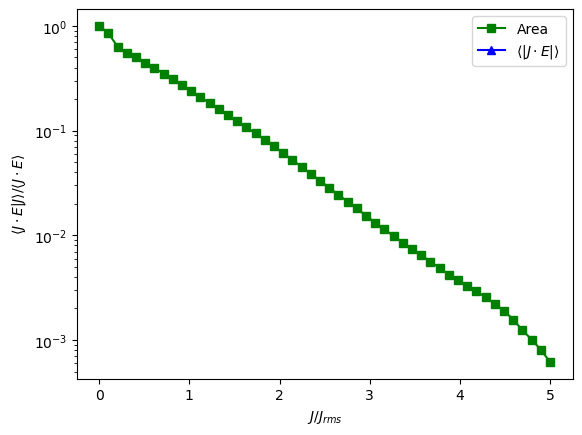

In [9]:
fig, ax = plt.subplots(1,1)
ax.semilogy(jmask, jfrn/jfrn[0], marker = 's', color = 'green', label = 'Area')
ax.semilogy(jmask, JEfrn/np.average(JE), marker = '^', color = 'blue', label = r'$\langle | J \cdot E | \rangle$')
# ax.semilogy(jmask, pidefrn/pidefrn[0], marker = 's', color = 'red', label = r'$\langle | PiD^e | \rangle$')
# ax.semilogy(jmask, pidifrn/pidifrn[0], marker = 's', color = 'black', label = r'$\langle | PiD^i | \rangle$')
ax.legend()
# ax.grid()
ax.set_xlabel(r'$J/J_{rms}$')
ax.set_ylabel(r'$\langle J \cdot E | J \rangle/ \langle J \cdot E \rangle$')
# fig.savefig(figs + 'Fn.png')

In [10]:
t = 400
print(twci[t])
pthe, pide = tb.ps_calc(dirs, times[t], 'electron')
pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')
Jie, JeE, JE = tb.JE_calc(dirs, times[t])
pidi_fil = sci.ndimage.uniform_filter(pidi, size = 10)
pide_fil = sci.ndimage.uniform_filter(pide, size = 10)
pidi_fil = sci.ndimage.uniform_filter(pidi, size = 10)
JE_fil = sci.ndimage.uniform_filter(JE, size = 10)

55.24272000000001


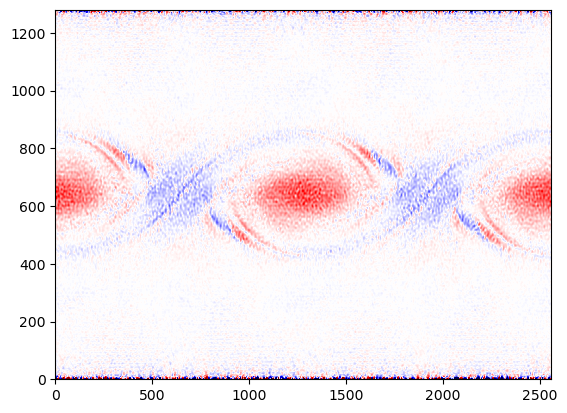

In [11]:
plt.pcolormesh(pidi_fil, cmap = 'seismic', vmin = -1e-5, vmax = 1e-5)

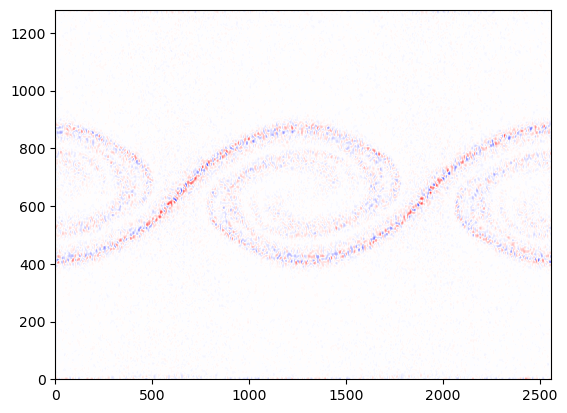

In [12]:
plt.pcolormesh(pide_fil, cmap = 'seismic', vmin = -1e-4, vmax = 1e-4)

In [13]:
max = 3e-5
JE_mask = np.where((JE_fil > max) | (JE_fil < -max), JE_fil, 0)
pide_mask = np.where((JE_fil > max) | (JE_fil < -max),pide_fil,0)
pidi_mask = np.where((JE_fil > max) | (JE_fil < -max),pidi_fil,0)
ind = np.where((JE_fil > max) | (JE_fil < -max))

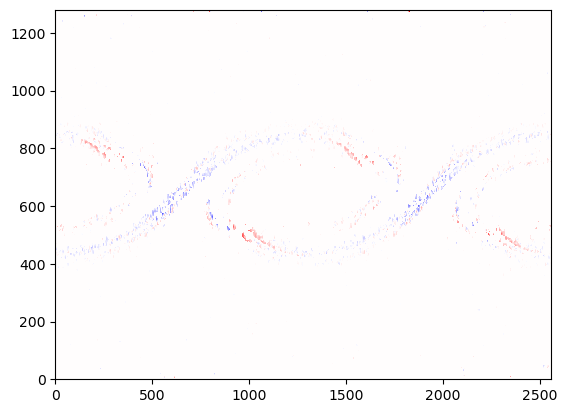

In [14]:
plt.pcolormesh(pidi_mask, cmap = 'seismic', vmin = -1e-5, vmax = 1e-5)

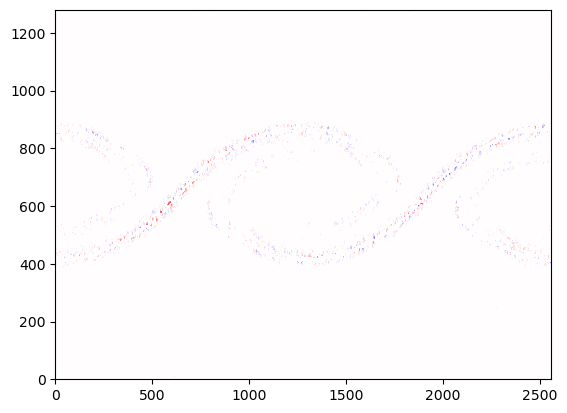

In [15]:
plt.pcolormesh(pide_mask, cmap = 'seismic', vmin = -1e-4, vmax = 1e-4)

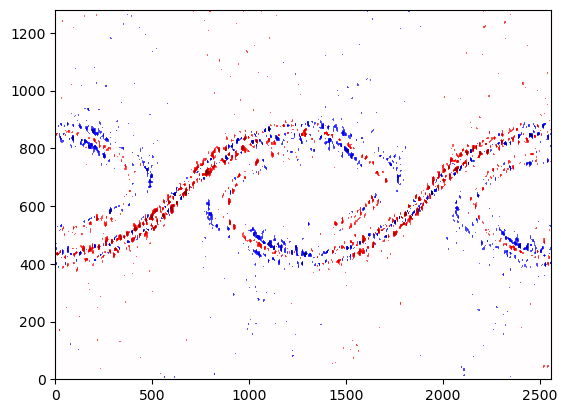

In [16]:
plt.pcolormesh(JE_mask, cmap = 'seismic', vmin = -1e-4, vmax = 1e-4)

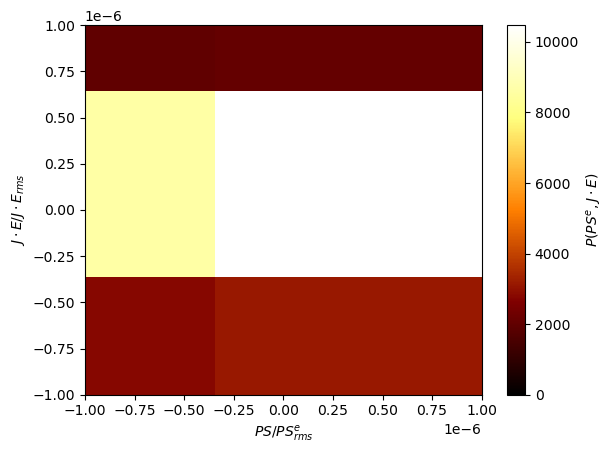

In [17]:
plt.hist2d((pide[ind]).flatten(), (pidi[ind]).flatten(),cmap = 'afmhot', bins = 100)
# plt.title(r'$t \omega_{ci} =$'f'{np.round(twci[t],1)}')
plt.xlim(-1e-6, 1e-6) 
plt.ylim(-1e-6, 1e-6)
plt.colorbar(label = r'$P(PS^e, J \cdot E)$')
plt.xlabel(r'$PS/PS^e_{rms}$')
plt.ylabel(r'$J \cdot E/J\cdot E_{rms}$')
plt.savefig(figs + 'PS_JE_2Dhist.png')

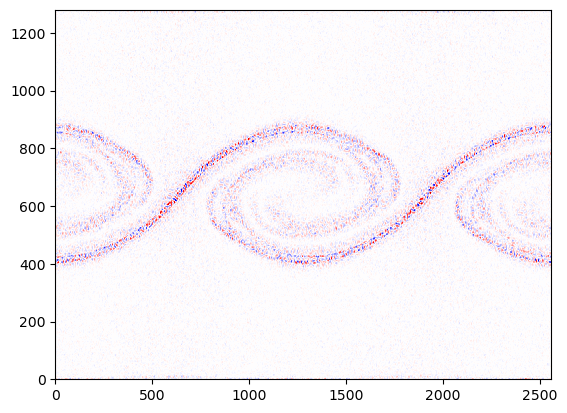

In [18]:
plt.pcolormesh(pide, cmap = 'seismic', vmin = -1e-4, vmax = 1e-4)

In [19]:
t = 1087
# tin = int(t/info['fields_interval'])
print(twci[t])

# ds = tb.load_hydro_fil(dirs, t)
JeE, JiE, JE, pthe, pide, pthi, pidi = time_av(1087)
# JiE, JeE, JE = tb.JE_calc(dirs, t)
# pth, pid = tb.ps_calc(dirs, t, 'electron')
psi = pidi + pthi
pidi_rms = np.sqrt(np.mean(pidi**2))
pthi_rms = np.sqrt(np.mean(pthi**2))
psi_rms = np.sqrt(np.mean((pidi + pthi)**2))

pse = pide + pthe
pide_rms = np.sqrt(np.mean(pide**2))
pthe_rms = np.sqrt(np.mean(pthe**2))
pse_rms = np.sqrt(np.mean((pide + pthe)**2))

JeE_rms = np.sqrt(np.mean(JeE**2))
JiE_rms = np.sqrt(np.mean(JiE**2))
JE_rms = np.sqrt(np.mean(JE**2))

# pid_rms = np.std(pid)
# ps_rms =np.std(pid + pth)
# pth_rms = np.std(pth)
# JeE_rms = np.std(JeE)
# JE_rms =  (np.std(JE))



150.12209160000003


In [20]:
# plt.pcolormesh(ds['jx'])

In [21]:
JE = JE/JE_rms
JeE = JeE/JeE_rms
JiE = JiE/JiE_rms
pide = pide/pide_rms
pidi = pidi/pidi_rms
pthe = pthe/pthe_rms
pthi = pthi/pthi_rms
pse = pse/pse_rms
psi = psi/psi_rms

In [22]:

# print(JE.shape)
max = 1
JE_mask = np.where((JE < max) | (JE > -max), JE, 0)
pid_mask = np.where((JE > max) | (JE < -max),pide,0)
pse_mask = np.where((JE > max) | (JE < -max),pse,0)
# pid_mask = np.where((pid > 1) | (pid < -1), pid, 0)
# print(JE[mask])
# JE = JE[mask[0], mask[1]]
# print(JE.shape)

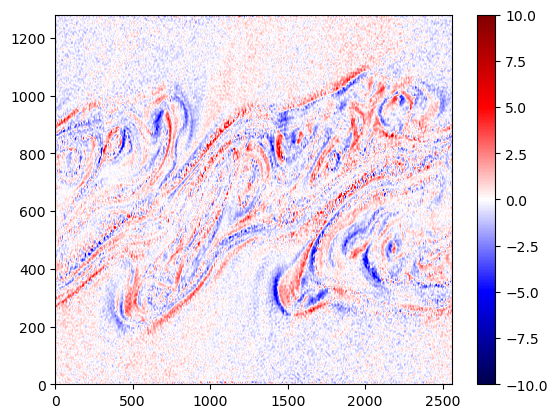

In [23]:
plt.pcolormesh(JE_mask, cmap = 'seismic', vmin = -10, vmax = 10)
plt.colorbar()

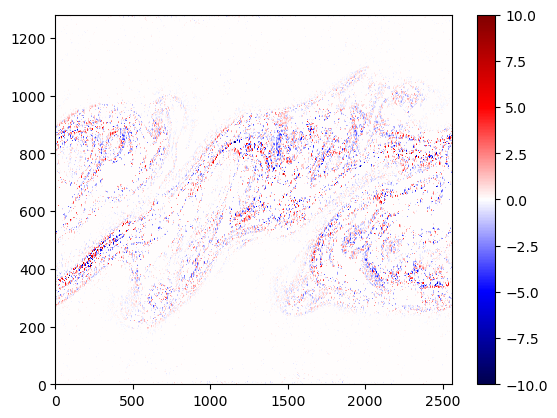

In [24]:
plt.pcolormesh(pid_mask, cmap = 'seismic', vmin = -10, vmax = 10)
plt.colorbar()

In [25]:
# max = 2
# pid_mask = np.where((JiE > max) | (JiE < -max),pid,0)
# JeE_mask = np.where((JeE > max) | (JeE < -max), JeE, 0)
# pid_mask = np.where((JeE > max) | (JeE < -max),pid,0)


In [26]:
t = 357
# tin = int(t/info['fields_interval'])
print(twci[t])
print(times[t])
# print(twci[t])
f = tb.load_field_fil(dirs, times[t])
el = tb.load_hydro_fil(dirs, times[t], 'electron')
ion = tb.load_hydro_fil(dirs, times[t], 'ion')
# ds = tb.load_hydro_fil(dirs, t)
# JeE, JiE, JE, pthe, pide, pthi, pidi =(t)
JiE, JeE, JE = tb.JE_calc(dirs, times[t])
pthe, pide = tb.ps_calc(dirs, times[t], 'electron')
pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')
psi = pidi + pthi
pidi_rms = np.sqrt(np.mean(pidi**2))
pthi_rms = np.sqrt(np.mean(pthi**2))
psi_rms = np.sqrt(np.mean((psi)**2))

pse = pide + pthe
pide_rms = np.sqrt(np.mean(pide**2))
pthe_rms = np.sqrt(np.mean(pthe**2))
pse_rms = np.sqrt(np.mean((pse)**2))

JeE_rms = np.sqrt(np.mean(JeE**2))
JiE_rms = np.sqrt(np.mean(JiE**2))
JE_rms = np.sqrt(np.mean(JE**2))

49.30412760000001
178500


In [27]:
JE = JE/JE_rms
JeE = JeE/JeE_rms
JiE = JiE/JiE_rms
pide = pide/pide_rms
pidi = pidi/pidi_rms
pthe = pthe/pthe_rms
pthi = pthi/pthi_rms
pse = pse/pse_rms
psi = psi/psi_rms

In [28]:
# max = 1e-2
# ind = np.where((el['jx'] > max) | (el['jx'] < -max))

# print(len(pidi[ind]))
print(pidi)

[[ 16.34080528  24.00464915  29.28876757 ...  -8.78313351  -1.22808512
    7.50977852]
 [ 15.4444108   21.42981648  25.54198812 ...  -3.62412119   1.95632126
    8.60438858]
 [ 13.07079089  16.39659922  18.47595314 ...   2.0261761    5.27347899
    9.13994452]
 ...
 [  5.40091409   9.17098487  11.76054584 ...  -7.71084443  -3.55465875
    0.97868648]
 [ 10.39274415  16.43805004  20.48133557 ... -10.79459686  -4.11619993
    3.22973204]
 [ 14.61470096  22.25800919  27.43922057 ... -11.42976466  -3.38004505
    5.66322191]]


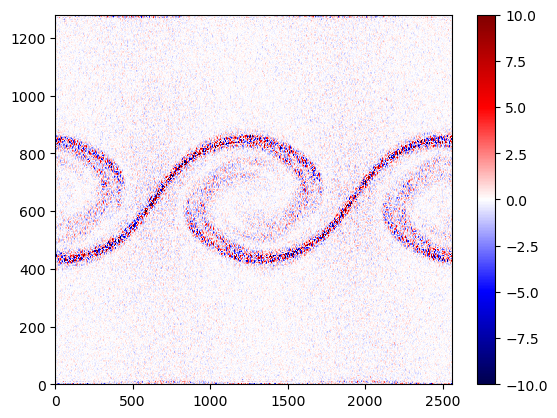

In [29]:
plt.pcolormesh(pide, cmap = 'seismic', vmin = -10, vmax = 10)
plt.colorbar()

Text(0, 0.5, '$J \\cdot E/J\\cdot E_{rms}$')

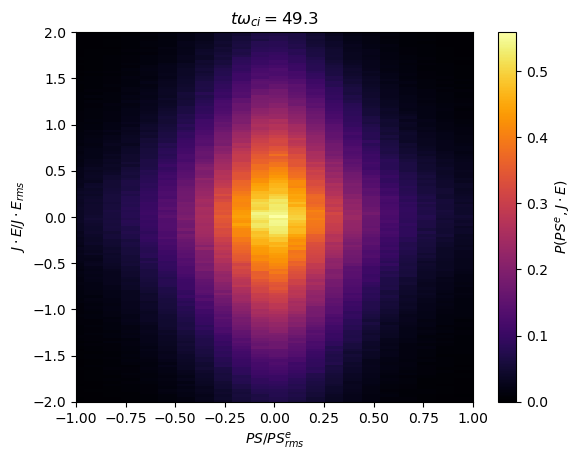

In [30]:
plt.hist2d((pide).flatten(), (JeE).flatten(),cmap = 'inferno',bins = 500,  density = True)
# plt.ylim(-5 *10**(-5), 5 *10**(-5))
# plt.xlim(-5 *10**(-6), 5 *10**(-6))
# plt.ylim(-2, 2)
# plt.xlim(-3, 3)
plt.xlim(-1, 1)
plt.ylim(-2, 2)
plt.title(r'$t \omega_{ci} =$'f'{np.round(twci[t],1)}')
plt.colorbar(label = r'$P(PS^e, J \cdot E)$')
plt.xlabel(r'$PS/PS^e_{rms}$')
plt.ylabel(r'$J \cdot E/J\cdot E_{rms}$')
# plt.savefig(figs + 'PS_JE_2Dhist.png')

In [31]:
np.corrcoef((pidi[ind]).flatten(), JeE[ind].flatten())

array([[1.        , 0.01704021],
       [0.01704021, 1.        ]])

In [32]:
# fig, axs = plt.subplots(1,4, figsize=(18,5), sharex = True, sharey = True)
# fig.subplots_adjust(wspace = 0, hspace = 0)
# snaps = [363, 507, 652, 1087]

# for i in np.arange(0,len(snaps)):
#   t = snaps[i]
#   ds = tb.load_hydro_fil(dirs, times[t])
#   JiE, JeE, JE = tb.JE_calc(dirs, times[t])
#   pth, pid = tb.ps_calc(dirs, times[t], 'electron')
#   ps = pid + pth
#   pid_rms = np.sqrt(np.mean(pid**2))
#   ps_rms = np.sqrt(np.mean((pid + pth)**2))
#   JeE_rms = np.sqrt(np.mean(JeE**2))
#   JE_rms = np.sqrt(np.mean(JE**2))

#   axs[i].hist2d((pid).flatten(), (JeE).flatten(),cmap = 'Purples', bins = 1500, density = True)
#   if i == 3:
#     cm = axs[3].hist2d((pid).flatten(), (JeE).flatten(),cmap = 'Purples', bins = 1500, density = True)
#     fig.colorbar(cm[3], ax = axs[3], label = r'$P(PS^e, J_e \cdot E)$')
#   axs[i].set_ylim(-0.0001, 0.0001)
#   axs[i].set_xlim(-0.00001, 0.00001)
#   axs[i].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[t],1)}')
#   fig.supxlabel(r'$PS^e/PS^e_{rms}$')
#   axs[0].set_ylabel(r'$J_e E/J_e E_{rms}$')
#   fig.savefig(figs + 'PS_JE_e_2Dhist.png')

In [33]:
# fig, axs = plt.subplots(1,4, figsize=(18,5), sharex = True, sharey = True)
# fig.subplots_adjust(wspace = 0, hspace = 0)
# snaps = [363, 507, 652, 1087]

# for i in np.arange(0,len(snaps)):
#   t = snaps[i]
#   ds = tb.load_hydro_fil(dirs, times[t])
#   JiE, JeE, JE = tb.JE_calc(dirs, times[t])
#   pth, pid = tb.ps_calc(dirs, times[t], 'ion')
#   ps = pid + pth
#   pid_rms = np.sqrt(np.mean(pid**2))
#   ps_rms = np.sqrt(np.mean((pid + pth)**2))
#   JiE_rms = np.sqrt(np.mean(JeE**2))
#   JeE_rms = np.sqrt(np.mean(JeE**2))
#   JE_rms = np.sqrt(np.mean(JE**2))

#   axs[i].hist2d((pid/pid_rms).flatten(), (JiE/JiE_rms).flatten(),cmap = 'Purples', bins = 1500, density = True)
#   if i == 3:
#     cm = axs[3].hist2d((ps/ps_rms).flatten(), (JiE/JiE_rms).flatten(),cmap = 'Purples', bins = 1500, density = True)
#     fig.colorbar(cm[3], ax = axs[3], label = r'$P(PS^i, J_i \cdot E)$')
#   axs[i].set_ylim(-2, 2)
#   axs[i].set_xlim(-2, 2)
#   axs[i].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[t],1)}')
#   fig.supxlabel(r'$PS^i/PS^i_{rms}$')
#   axs[0].set_ylabel(r'$J_i E/J_i E_{rms}$')
#   fig.savefig(figs + 'PS_JE_i_2Dhist.png')

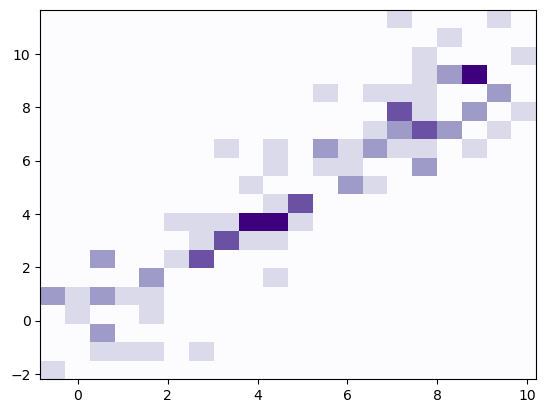

In [34]:
x = np.linspace(0, 10, 100) + np.random.randn(100)
y = np.linspace(0, 10, 100) + np.random.randn(100)
ax = plt.hist2d(x, y,cmap = 'Purples', bins = 20, density = True)

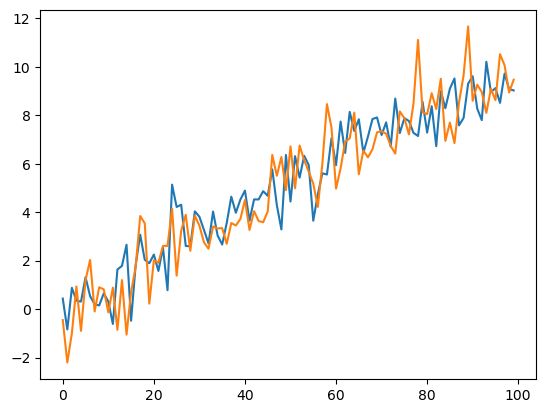

In [35]:
plt.plot(x)
plt.plot(y)